In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#check for null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
#total rows
print("Total rows: {0}".format(len(df)))

Total rows: 545


In [5]:
#check for categorical variables
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


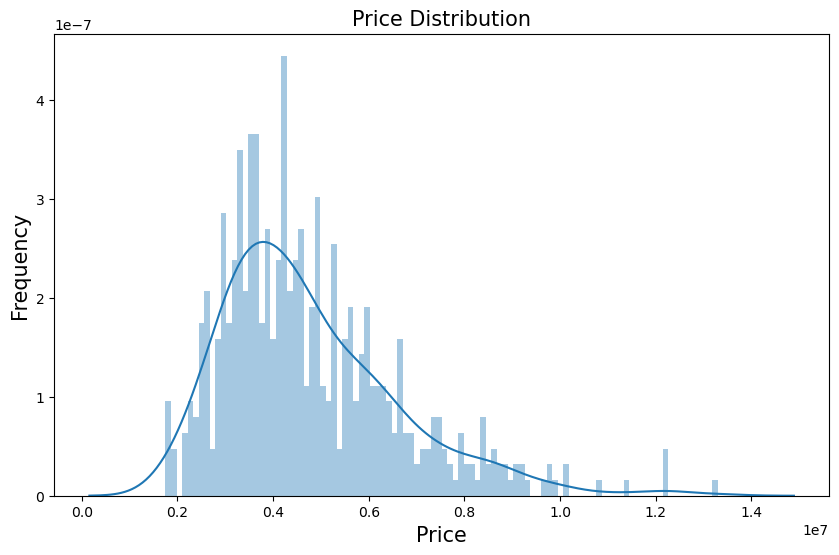

In [6]:
#price distribution
plt.figure(figsize=(10,6))
sns.distplot(df['price'], bins=100)
plt.title('Price Distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()


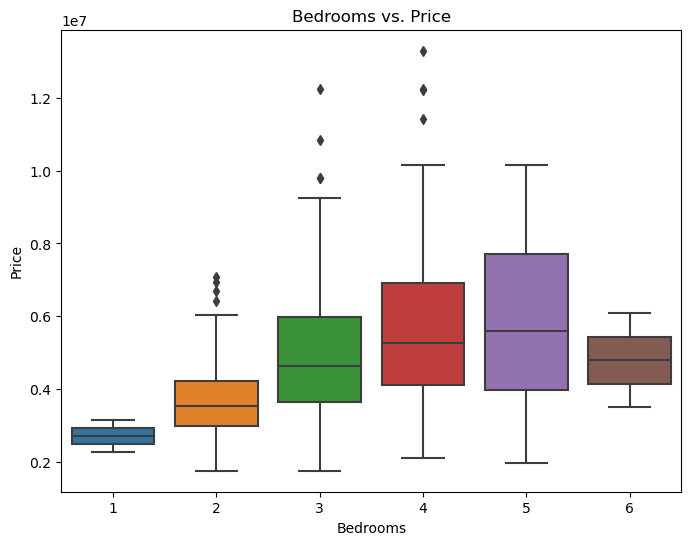

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="bedrooms", y="price", data=df)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs. Price")
plt.show()

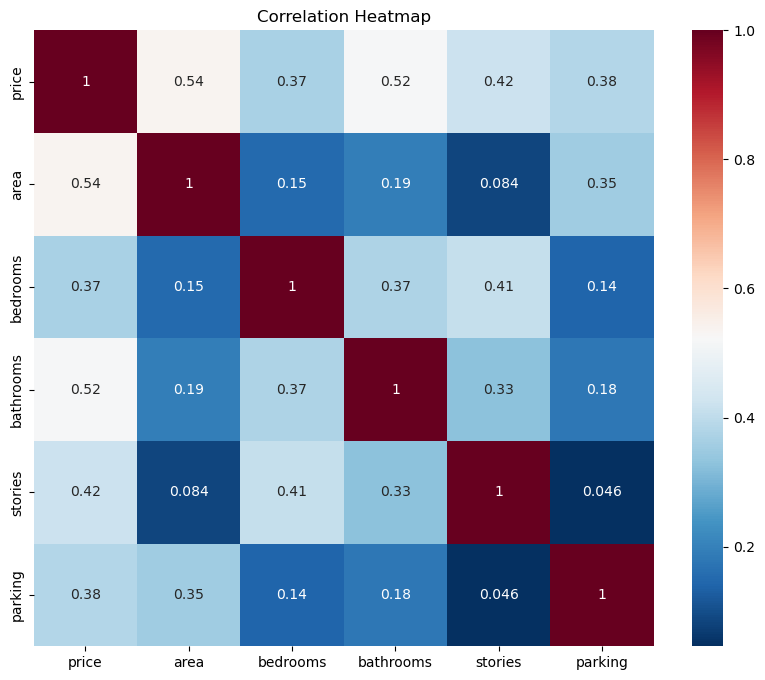

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu_r")
plt.title("Correlation Heatmap")
plt.show()

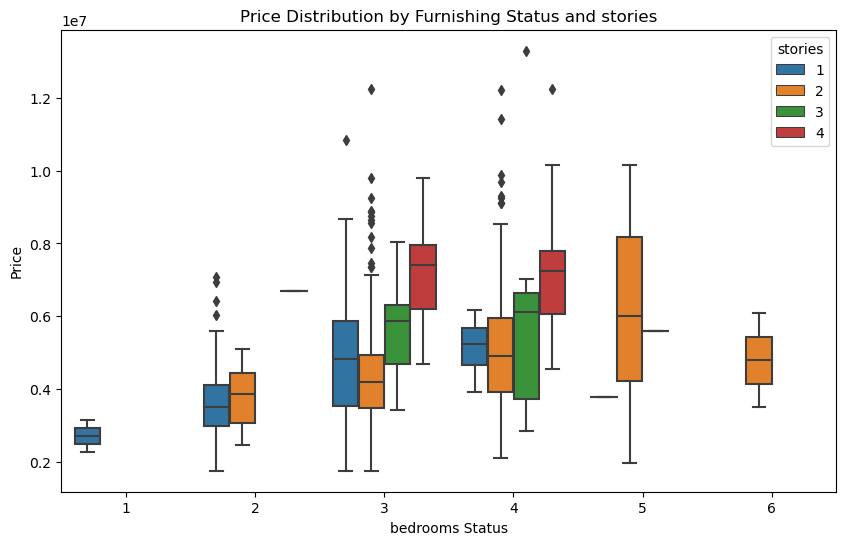

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="bedrooms", y="price", hue="stories", data=df)
plt.xlabel("bedrooms Status")
plt.ylabel("Price")
plt.title("Price Distribution by Furnishing Status and stories")
plt.show()

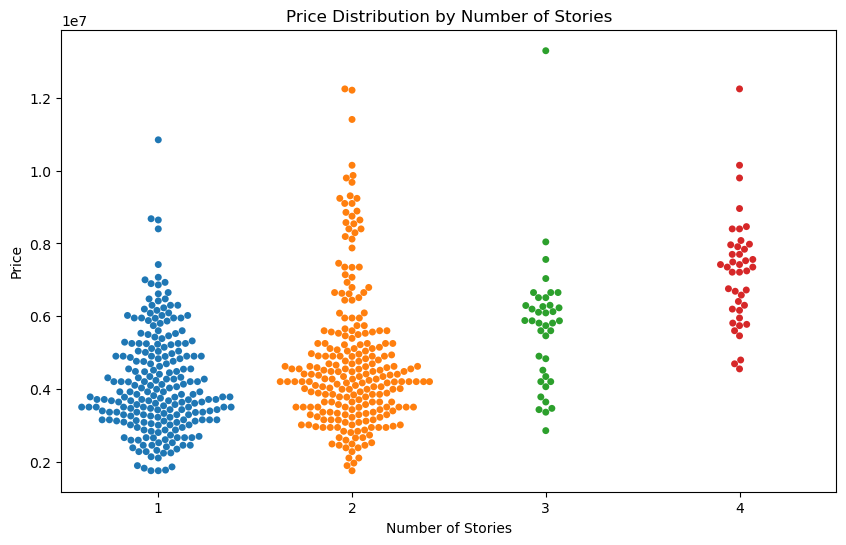

In [10]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x="stories", y="price", data=df)
plt.xlabel("Number of Stories")
plt.ylabel("Price")
plt.title("Price Distribution by Number of Stories")
plt.show()

In [11]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns

In [12]:
print(cat_cols)

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [13]:
#remove furnishingstatus from cat_cols variable
cat_cols = cat_cols[:-1]
cat_cols

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [14]:
#change categorical data to numerical data

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Loop through each categorical column in cat_cols
for col in cat_cols:
    # Fit the LabelEncoder object to the categorical column
    le.fit(df[col])
    # Transform the categorical column to an integer column
    df[col] = le.transform(df[col])


In [15]:
furnishing_status_ohe = pd.get_dummies(df['furnishingstatus'], prefix='furnishing')
df = pd.concat([df, furnishing_status_ohe], axis=1)
df.drop('furnishingstatus', axis=1, inplace=True)

In [16]:
#logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#set the target variable
y = df['price']
X = df.drop(['price'], axis=1)

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [18]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 1754318687330.6638
Mean Absolute Error (MAE): 970043.4039201637
R-squared Score: 0.6529242642153184

Results for Decision Tree:
Mean Squared Error (MSE): 2839327027522.9355
Mean Absolute Error (MAE): 1217036.6972477064
R-squared Score: 0.43826539366669215

Results for Random Forest:
Mean Squared Error (MSE): 1929378779922.9946
Mean Absolute Error (MAE): 1007672.233027523
R-squared Score: 0.6182902431096848

Results for SVR:
Mean Squared Error (MSE): 5567932621241.873
Mean Absolute Error (MAE): 1763890.3374061887
R-squared Score: -0.10156400047103098

Results for XGBoost:
Mean Squared Error (MSE): 1924452096795.6921
Mean Absolute Error (MAE): 1020642.1582568807
R-squared Score: 0.6192649418253373

Results for LightGBM:
Mean Squared Error (MSE): 1926431894616.271
Mean Absolute Error (MAE): 1022791.0450451776
R-squared Score: 0.6188732571273148

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 1679860841734.322
Mea

d:\python\odyn\anak2\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Learning rate set to 0.03591
0:	learn: 1723678.4981439	total: 134ms	remaining: 2m 13s
1:	learn: 1693568.7294170	total: 135ms	remaining: 1m 7s
2:	learn: 1664321.8818241	total: 137ms	remaining: 45.4s
3:	learn: 1639269.9734390	total: 138ms	remaining: 34.3s
4:	learn: 1611256.5697174	total: 139ms	remaining: 27.7s
5:	learn: 1587664.0843424	total: 141ms	remaining: 23.3s
6:	learn: 1564262.4920314	total: 142ms	remaining: 20.2s
7:	learn: 1541220.4417205	total: 143ms	remaining: 17.8s
8:	learn: 1521856.5492117	total: 144ms	remaining: 15.9s
9:	learn: 1500947.5280476	total: 146ms	remaining: 14.4s
10:	learn: 1480880.8910180	total: 147ms	remaining: 13.2s
11:	learn: 1458308.6140459	total: 148ms	remaining: 12.2s
12:	learn: 1442360.0299126	total: 149ms	remaining: 11.3s
13:	learn: 1422282.4682125	total: 150ms	remaining: 10.6s
14:	learn: 1406471.4671199	total: 151ms	remaining: 9.93s
15:	learn: 1387327.8683450	total: 152ms	remaining: 9.37s
16:	learn: 1369616.7288126	total: 153ms	remaining: 8.87s
17:	learn: 

In [19]:
accuracy

[0.6529242642153184,
 0.43826539366669215,
 0.6182902431096848,
 -0.10156400047103098,
 0.6192649418253373,
 0.6188732571273148,
 0.6676550606959818,
 0.551031677793743,
 0.3716903219584978,
 0.23627748974975327,
 0.6320091539639165]

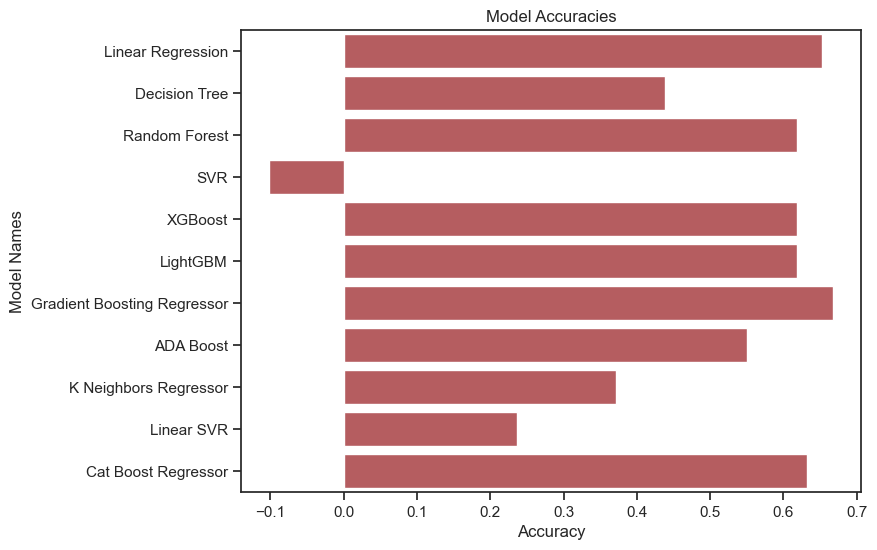

In [23]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()